<a href="https://colab.research.google.com/github/shrikantha/Anagram1/blob/master/M1_AST_01_SklearnPipeline_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Assignment 1: Pipeline Optimization with Scikit-Learn

## Learning Objectives

At the end of the experiment, you will be able to:

- appreciate the significance of a pipeline and its optimization
- setup a machine learning pipeline
- optimize the pipeline
- know techniques to analyze the results of optimization

## Information

A machine learning pipeline can be created by putting together a sequence of steps involved in training a machine learning model. It can be used to automate a machine learning workflow. The pipeline can involve pre-processing, feature selection, classification/regression, and post-processing steps. More complex applications may need to fit in other necessary steps within this pipeline.

Substances in traditional fire-extinguishing techniques may leave chemical waste, harm human health and cause social and economic damages. Therefore research on fire-extinguishing using renewable energy sources is important. The impact of sound waves on flame and combustion behavior of fuel is a common.

Fire is a chemical reaction that breaks out with the combination of heat, fuel, and oxygen components. The heat, gas, and smoke resulting from this oxidation reaction may significantly harm to human and the environment. Early intervention to the fire facilitates to extinguish. However, depending on the scale of the fire and the fuel type, fire-extinguishing agents may vary. These substances in traditional fire-extinguishing techniques may leave chemical waste and harm human health. Additionally, it can also cause social and economic damages. In order to eliminate these impacts, researches on fire-extinguishing with renewable energy sources have been carried out. Currently, the impact of sound waves on flame and combustion behavior of fuel is a common research topic. The pressure changes in the air as a result of the sound waves lead to the occurrence of airflow. This airflow changes the behavior of the flame, fuel, and oxygen in the environment. The airflow created by the sound waves enables the fuel to spread over a wider surface. At this phase, the flame shows the tendency of spreading over a wide area together with the fuel. Fuel consumption also increases by the fuel particle oscillation due to the spread of flame and sound waves. While these stages are taking place, the air in the fire environment mixes and the amount of oxygen decreases as a result of the compression and expansion movements in the air. Through the combination of these three events, the flame can be extinguished. Necessary frequency ranges are available for the flame to be extinguished with the sound waves. Besides the frequency characteristic of sound waves, sound intensity level and the distance are also the factors having an impact on the ability to extinguish the flame.

Utilizing the fire characteristics, studies have been carried out to estimate the parameters necessary for the detection and extinguishing of the fire. The data have been obtained by examining the characteristics of the flames extinguished using sound waves. Statistical analysis and classification algorithms using these data provide information on the behaviour of the flame.


To know more about the experiment, click [here](https://ieeexplore.ieee.org/document/9452168).

## Dataset

The dataset was obtained as a result of the extinguishing tests of four different fuel flames with a sound wave extinguishing system. The sound wave fire-extinguishing system consists of 4 subwoofers with a total power of 4,000 Watt placed in the collimator cabinet. There are two amplifiers that enable the sound come to these subwoofers as boosted. Power supply that powers the system and filter circuit ensuring that the sound frequencies are properly transmitted to the system is located within the control unit. While computer is used as frequency source, anemometer was used to measure the airflow resulted from sound waves during the extinguishing phase of the flame, and a decibel meter to measure the sound intensity. An infrared thermometer was used to measure the temperature of the flame and the fuel can, and a camera is installed to detect the extinction time of the flame. A total of 17,442 tests were conducted with this experimental setup.

The experiments are planned as follows:

- Three different liquid fuels and LPG fuel were used to create the flame.
- 5 different sizes of liquid fuel cans are used to achieve different size of flames.
- Half and full gas adjustment is used for LPG fuel.
- While carrying out each experiment, the fuel container, at 10 cm distance, was moved forward up to 190 cm by increasing the distance by 10 cm each time.
- Along with the fuel container, anemometer and decibel meter were moved forward in the same dimensions.
- Fire extinguishing experiments was conducted with 54 different frequency sound waves at each distance and flame size.
Throughout the flame extinguishing experiments, the data obtained from each measurement device was recorded and a dataset was created.


The dataset includes following features:

- **SIZE:** *fuel container size representing the flame size*
- **FUEL:** *fuel type*
- **FREQUENCY**
- **DECIBEL**
- **DISTANCE**
- **AIRFLOW**
- **STATUS:** *flame extinction (dependent/target variable)*

Accordingly, 6 input features and 1 output feature will be used in models. The explanation of a total of seven features for liquid fuels in the dataset is given in Table 1, and the explanation of 7 features for LPG fuel is given in Table 2.
The status property (flame extinction or non-extinction states) can be predicted by using six features in the dataset. Status and fuel features are categorical, while other features are numerical. 8,759 of the 17,442 test results are the non-extinguishing state of the flame. 8,683 of them are the extinction state of the flame. According to these numbers, it can be said that the class distribution of the dataset is almost equal."

To know more about the dataset, click [here](https://www.kaggle.com/datasets/muratkokludataset/acoustic-extinguisher-fire-dataset).

### Setup Steps:

In [2]:
from IPython import get_ipython

ipython = get_ipython()

notebook= "M1_AST_01_SklearnPipeline_C" #name of the notebook
ipython.magic("sx wget https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/Acoustic_Extinguisher_Fire_Dataset.xlsx")
from IPython.display import HTML, display
display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
print("Setup completed successfully")


Setup completed successfully


### Import Required Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                 # For plotting data
import seaborn as sns                                           # For plotting data
from sklearn.model_selection import train_test_split            # For train/test splits
from sklearn.neighbors import KNeighborsClassifier              # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold         # Feature selector
from sklearn.pipeline import Pipeline                           # For setting up pipeline

# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV                # For optimization

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

### Load the Dataset

In [4]:
df = pd.read_excel('Acoustic_Extinguisher_Fire_Dataset.xlsx', sheet_name='A_E_Fire_Dataset')
# Shape of dataframe
df.shape

(17442, 7)

### Data Exploration

In [5]:
# Show first few rows of dataframe
df.head(8)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
5,1,gasoline,10,109,7.8,66,1
6,1,gasoline,10,103,9.7,65,1
7,1,gasoline,10,95,12.0,60,1


From above it can be seen that:

- There are 6 independent variables
- `FUEL` is a categorical feature
- Every other feature is numerical
- `STATUS` is the dependent variable
- It is a binary classification problem

### Segregating the dataframe into independent and dependent features

In [6]:
# The data matrix X
X = df.iloc[:, :-1]
# The labels
y = (df.iloc[:,-1:])

X.shape, y.shape

((17442, 6), (17442, 1))

In [7]:
# Independent features
X

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,gasoline,10,96,0.0,75
1,1,gasoline,10,96,0.0,72
2,1,gasoline,10,96,2.6,70
3,1,gasoline,10,96,3.2,68
4,1,gasoline,10,109,4.5,67
...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5
17438,7,lpg,190,84,2.0,4
17439,7,lpg,190,80,1.5,3
17440,7,lpg,190,76,0.4,2


### Exploring the unique categories in categorical feature

In [8]:
# Unique values in FUEL column
X['FUEL'].value_counts()

gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: FUEL, dtype: int64

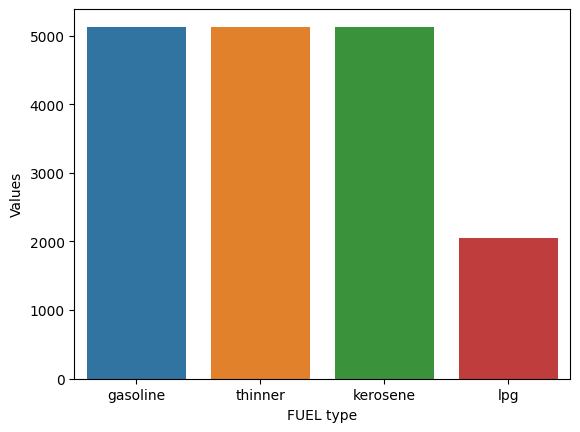

In [10]:
# Plot unique values in FUEL column
uniques = X['FUEL'].value_counts()
sns.barplot(x = uniques.index, y = uniques.values)
plt.xlabel("FUEL type")
plt.ylabel("Values")
plt.show()

### Encoding the Categorical Feature

In [11]:
# Ordinal encode input variable
ordinal = OrdinalEncoder()
X['FUEL'] = ordinal.fit_transform(X[['FUEL']])

In [12]:
X.tail(110)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
17332,7,2.0,170,78,1.4,2
17333,7,2.0,170,76,0.0,1
17334,7,2.0,180,104,0.0,75
17335,7,2.0,180,97,0.0,72
17336,7,2.0,180,96,0.0,70
...,...,...,...,...,...,...
17437,7,2.0,190,86,2.2,5
17438,7,2.0,190,84,2.0,4
17439,7,2.0,190,80,1.5,3
17440,7,2.0,190,76,0.4,2


After ordinal encoding, all the features are numerical in nature now.

In [13]:
# Prediction features
X.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,0.0,10,96,0.0,75
1,1,0.0,10,96,0.0,72
2,1,0.0,10,96,2.6,70
3,1,0.0,10,96,3.2,68
4,1,0.0,10,109,4.5,67


In [14]:
# Target feature: Extinction Status
y

,STATUS
0,0
1,1
2,1
3,1
4,1
...,...
17437,0
17438,0
17439,0
17440,0


### Split the data into train and test sets

In [15]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,                  # predictors
                                                    y,                  # labels
                                                    test_size=1/3,      # test set size
                                                    random_state=0)     # set random number generator seed for reproducibility

print(X_train.shape)
print(X_test.shape)

(11628, 6)
(5814, 6)


### A Classifier Without a Pipeline and Optimization

First, let’s just check how the k-nearest neighbor performs on the training and test sets. This would give us a baseline for performance.



In [16]:
# Instantiate KNN classifier and fit on train set
knn = KNeighborsClassifier().fit(X_train, y_train)

# Performance on train and test sets
print('Training set score: ' + str(knn.score(X_train,y_train)))
print('Test set score: ' + str(knn.score(X_test,y_test)))

Training set score: 0.9422084623323014
Test set score: 0.9165806673546611


### Setting Up a Machine Learning Pipeline

- **Scaler:** For pre-processing data, i.e., transform the data to zero mean and unit variance using the `StandardScaler()`.

- **Feature selector:** Use `VarianceThreshold()` for discarding features whose variance is less than a certain defined threshold.

- **Classifier:** `KNeighborsClassifier()`, which implements the k-nearest neighbor classifier and selects the class of the majority k points, which are closest to the test example.

In [17]:
# Setup pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('selector', VarianceThreshold()),
                 ('classifier', KNeighborsClassifier())
                 ])

In [18]:
# Fit pipeline on train set
pipe.fit(X_train, y_train)

# Performance on train and test sets
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.9765221878224974
Test set score: 0.9614723082215342


It can be clearly noticed that setting the pipeline, including `StandardScaler()` and `VarianceThreshold()` has helped train a good model because scores are better both for training and test data when compared with the model without using a pipeline.

### Optimizing and Tuning the Pipeline with GridSearchCV

In the code below, we’ll show the following:

- We can search for the best scalers. Instead of just the `StandardScaler()`, we can try `MinMaxScaler()`, `Normalizer()`, and `MaxAbsScaler()`.

- We can search for the best variance threshold to use in the selector, i.e., `VarianceThreshold()`.

- We can search for the best value of k for the `KNeighborsClassifier()`.

In [19]:
parameters = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
              'selector__threshold': [0, 0.001, 0.01],
			  'classifier__n_neighbors': [1, 3, 5, 7, 10],           # Number of neighbors to use by default for k-neighbors
			  'classifier__p': [1, 2],                               # Power parameter for the Minkowski metric
			  'classifier__leaf_size': [1, 5, 10, 15]                # Leaf size passed to BallTree or KDTree. This can affect the speed of the
			  }                                                      # construction and query, as well as the memory required to store the tree

In [20]:
4*3*5*2*4

480

Here, we have passed a list of parameters that the GridsearchCV algorithm will use to come at an optimum solution. It will go through every combination of this parameters to get an optimal solution. So, total iterations here will be 4 $\times$ 3 $\times$ 5 $\times$ 2 $\times$ 4 = 480.

`n_neighbors`, `p` and `leaf_size` are the parameter for `KNeighborsClassifier()`.

To know more about `KNeighborsClassifier()`, refer [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

In [21]:
# Instantiate GridSearchCV
grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)

# Performance on train and test sets
print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

Training set score: 0.9800481596147231
Test set score: 0.9685242518059856


To know more about GridSearchCV, refer [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV).

### Analyzing the Results


In [23]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier__leaf_size': 15, 'classifier__n_neighbors': 5, 'classifier__p': 1, 'scaler': MaxAbsScaler(), 'selector__threshold': 0}
Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier', KNeighborsClassifier(leaf_size=15, p=1))])


Another useful technique for analyzing the results is to construct a DataFrame from the `grid.cv_results_` attribute.

In [24]:
# Create a dataframe
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__leaf_size', 'param_classifier__n_neighbors',
       'param_classifier__p', 'param_scaler', 'param_selector__threshold',
       'params', 'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [25]:
result_df.shape

(480, 15)

In [26]:
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__leaf_size,param_classifier__n_neighbors,param_classifier__p,param_scaler,param_selector__threshold,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017968,0.001651,0.371903,0.027046,1,1,1,StandardScaler(),0,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.946508,0.947196,0.946852,0.000344,337
1,0.021068,0.001234,0.467165,0.108085,1,1,1,StandardScaler(),0.001,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.946508,0.947196,0.946852,0.000344,337
2,0.018463,0.002166,0.386540,0.003281,1,1,1,StandardScaler(),0.01,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.946508,0.947196,0.946852,0.000344,337
3,0.016160,0.000070,0.398308,0.039202,1,1,1,MinMaxScaler(),0,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.949776,0.951840,0.950808,0.001032,205
4,0.020868,0.004521,0.490496,0.061931,1,1,1,MinMaxScaler(),0.001,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.949776,0.951840,0.950808,0.001032,205


This DataFrame is very valuable as it shows us the scores for different parameters. The column with the `mean_test_score` is the average of the scores on the test set for all the folds during cross-validation. The DataFrame may be too big to visualize manually, hence, it is always a good idea to plot the results.

Let’s see how `n_neighbors` affect the performance for different `scalers`, and for different values of `p`.

In [27]:
import math

# Define the dimensions of the pyramid in meters
b = 146.5 # base length
h = 148.875 # height
s = 0.254 * b * h # side slant height

# Calculate the volume of the pyramid using Heron's formula
volume = (s*(s-b)/2)**(3/2)

print("The volume of the Great Pyramid of Giza is", volume, "cubic meters.")

The volume of the Great Pyramid of Giza is 57739770463.25093 cubic meters.


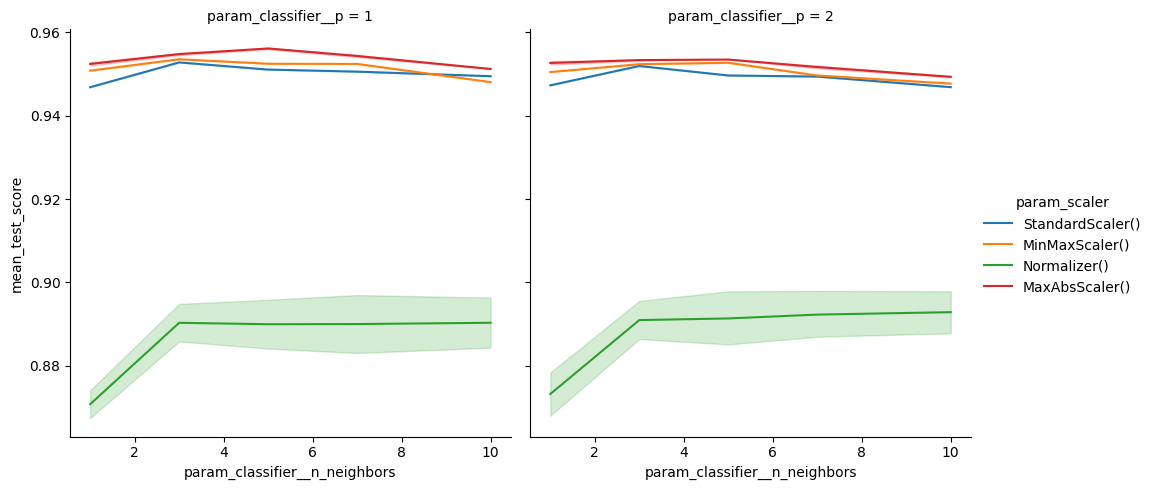

In [28]:
sns.relplot(data = result_df,
            kind = 'line',
			x = 'param_classifier__n_neighbors',
			y = 'mean_test_score',
			hue = 'param_scaler',
			col = 'param_classifier__p')
plt.show()

From the above plots, it can be seen that:

- For both `p = 1` and `2`, worst performing scaler method is `Normalizer()`
- For both `p = 1` and `2`, best performing scaler is `MaxAbsScaler()`
- For `p = 1` and `scaler = MaxAbsScaler()`, there is a peak in `mean_test_score` at `n_neighbors = 5`.

Let’s see how `n_neighbors` affect the performance for different `scalers`, and for different values of `life_size`.

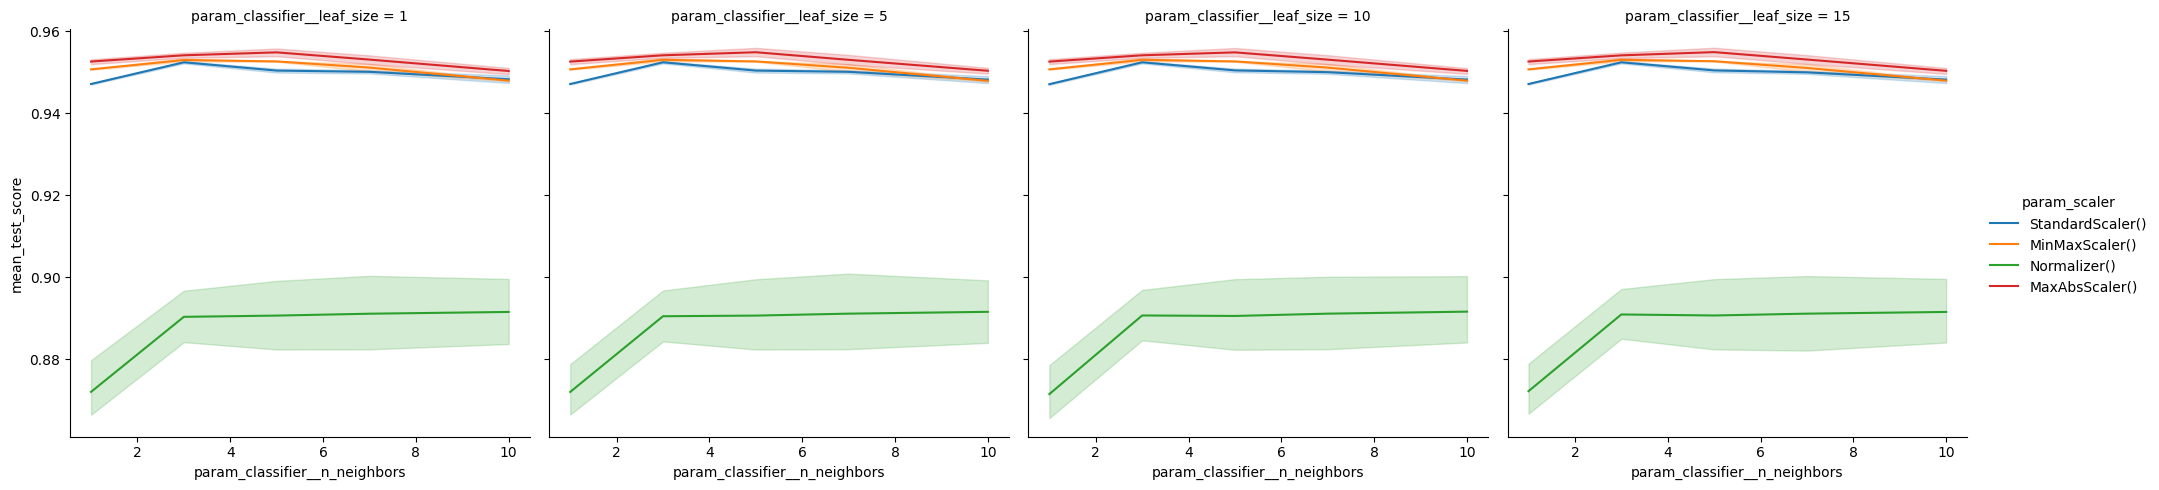

In [29]:
sns.relplot(data = result_df,
            kind = 'line',
            x = 'param_classifier__n_neighbors',
            y = 'mean_test_score',
            hue = 'param_scaler',
            col = 'param_classifier__leaf_size')
plt.show()

- For all the `leaf_size` parameters, that is 1, 5, 10, 15, worst performing scaler method is `Normalizer()`.
- For all the `leaf_size` parameters, best performing scaler is `MaxAbsScaler()`.
- For all the `leaf_size` parameters, there is a peak at `n_neighbors = 5`.

`MaxAbsScaler()` is performing well because it scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be $1.0$. It does not shift or center the data, and thus does not destroy any sparsity.

To know more about `MaxAbsScaler()`, refer [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler).